In [1]:
import pandas as pd
from googleapiclient.discovery import build

In [72]:
API_KEY = 'YOUR_API_KEY'

In [3]:
def get_trending_videos(api_key, max_results=200):
    #Build the youtube service
    youtube = build('youtube','v3', developerKey=api_key)

    # initialize the list to hold video details
    videos = []

    # Fetch the most Popular Videos 
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='US',
        maxResults=50
    )

    # paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption' : item['contentDetails'].get('caption', 'false'),
                'view_count' : item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count' : item['statistics'].get('dislikeCount', 0),
                'favorite_count' : item['statistics'].get('faoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()

Trending videos saved to trending_videos.csv


In [4]:
import pandas as pd

trending_videos = pd.read_csv('trending_videos.csv')

In [5]:
trending_videos

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,uarNiSl_uh4,Apple Event - September 9,Watch the special Apple Event to learn about t...,2024-09-09T18:47:22Z,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"['Apple', 'Apple Event', 'iPhone 16', 'iPhone ...",PT1H38M19S,hd,True,21543728,593874,0,0,0
1,bEweK7ffTcQ,New York Jets vs. San Francisco 49ers Game Hig...,Check out our other channels:\nNFL Mundo https...,2024-09-10T03:21:58Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,[],PT11M57S,hd,True,1456981,23937,0,0,2775
2,eDqfg_LexCQ,Introducing iPhone 16 Pro | Apple,This is iPhone 16 Pro. Built for Apple Intelli...,2024-09-09T18:55:07Z,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"['Apple', 'iPhone 16 Pro', 'iPhone 16 Pro Max'...",PT2M53S,hd,True,9037892,166083,0,0,0
3,QZAhsa0X_e4,The Pat McAfee Show Live | Monday September 9t...,Welcome to The Pat McAfee Show LIVE from Noon-...,2024-09-09T19:49:16Z,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,"['pat mcafee', 'podcast', 'sports', 'nfl', 'nc...",PT3H34M46S,hd,False,508432,8623,0,0,345
4,14r1_sEd7_U,Apple iPhone 16 Event: Everything Apple Announ...,Apple just announced the new iPhone 16 lineup ...,2024-09-09T20:31:09Z,UCaFGDBmGK_jw66u3av2Ysjw,MacRumors,28,"['macrumors', 'mac rumors', 'apple', 'apple ru...",PT12M56S,hd,False,477613,6488,0,0,1352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,jYh-_CFrDrc,Season 33 Cast Reveal | Dancing with the Stars,The stars of the new season have arrived to gi...,2024-09-04T12:52:05Z,UCLOIoa2aEGcM-z1hJx4vy4w,Dancing With The Stars,24,"['Disney+', 'Disney Plus', 'Disney', 'streamin...",PT31S,hd,False,2637572,922,0,0,272
196,sgTBZmqrAIA,Alien: Earth | Official Teaser | Sydney Chandl...,The perfect planet for the perfect organism. A...,2024-09-03T15:59:55Z,UC2dIDJBf9W88PxGm-uHZPaQ,FX Networks,24,"['FX', 'Ridley Scott', 'Alex Lawther', 'Samuel...",PT16S,hd,True,596838,7988,0,0,922
197,AiHSbb9xzEo,This KEVIN DURANT Build is INSANE on NBA 2K25,"In today's video, we are playing on our NEW Ke...",2024-09-03T22:53:26Z,UCthnSP58HNeD3857_AWIesA,Joey 2K,20,"['NBA 2K25', '2K25', 'Kevin Durant', 'NBA 2K25...",PT11M21S,hd,False,258458,4263,0,0,261
198,s6jnvRy7BOk,United v Liverpool Fallout & Gary and Carra Cl...,Welcome to a very special episode of Stick to ...,2024-09-05T16:25:08Z,UCjXIw1GlwaY1IzpW_jN9iCQ,The Overlap,22,"['Sky Sports', 'Sport', 'Football', 'Premier L...",PT51M19S,hd,False,1581495,19441,0,0,2823


In [6]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,uarNiSl_uh4,Apple Event - September 9,Watch the special Apple Event to learn about t...,2024-09-09T18:47:22Z,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"['Apple', 'Apple Event', 'iPhone 16', 'iPhone ...",PT1H38M19S,hd,True,21543728,593874,0,0,0
1,bEweK7ffTcQ,New York Jets vs. San Francisco 49ers Game Hig...,Check out our other channels:\nNFL Mundo https...,2024-09-10T03:21:58Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,[],PT11M57S,hd,True,1456981,23937,0,0,2775
2,eDqfg_LexCQ,Introducing iPhone 16 Pro | Apple,This is iPhone 16 Pro. Built for Apple Intelli...,2024-09-09T18:55:07Z,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"['Apple', 'iPhone 16 Pro', 'iPhone 16 Pro Max'...",PT2M53S,hd,True,9037892,166083,0,0,0
3,QZAhsa0X_e4,The Pat McAfee Show Live | Monday September 9t...,Welcome to The Pat McAfee Show LIVE from Noon-...,2024-09-09T19:49:16Z,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,"['pat mcafee', 'podcast', 'sports', 'nfl', 'nc...",PT3H34M46S,hd,False,508432,8623,0,0,345
4,14r1_sEd7_U,Apple iPhone 16 Event: Everything Apple Announ...,Apple just announced the new iPhone 16 lineup ...,2024-09-09T20:31:09Z,UCaFGDBmGK_jw66u3av2Ysjw,MacRumors,28,"['macrumors', 'mac rumors', 'apple', 'apple ru...",PT12M56S,hd,False,477613,6488,0,0,1352


In [7]:
trending_videos.shape

(200, 16)

In [8]:
trending_videos.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [9]:
trending_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        200 non-null    object
 1   title           200 non-null    object
 2   description     197 non-null    object
 3   published_at    200 non-null    object
 4   channel_id      200 non-null    object
 5   channel_title   200 non-null    object
 6   category_id     200 non-null    int64 
 7   tags            200 non-null    object
 8   duration        200 non-null    object
 9   definition      200 non-null    object
 10  caption         200 non-null    bool  
 11  view_count      200 non-null    int64 
 12  like_count      200 non-null    int64 
 13  dislike_count   200 non-null    int64 
 14  favorite_count  200 non-null    int64 
 15  comment_count   200 non-null    int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 23.8+ KB


In [10]:
trending_videos.describe()

,category_id,view_count,like_count,dislike_count,favorite_count,comment_count
count,200.000000,2.000000e+02,2.000000e+02,200.0,200.0,200.000000
mean,18.940000,2.492575e+06,9.379644e+04,0.0,0.0,6588.085000
std,7.077915,6.808939e+06,2.581162e+05,0.0,0.0,20866.740141
min,1.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000
25%,17.000000,3.059382e+05,6.446250e+03,0.0,0.0,814.500000
50%,20.000000,6.329955e+05,2.471150e+04,0.0,0.0,1779.000000
75%,24.000000,1.585153e+06,7.100675e+04,0.0,0.0,4422.500000
max,28.000000,6.793340e+07,2.594469e+06,0.0,0.0,245602.000000


In [11]:
# mCheck for missing values
missing_values = trending_videos.isnull().sum()

In [12]:
# Display data types
data_types = trending_videos.dtypes

In [13]:
missing_values, data_types

(video_id          0
 title             0
 description       3
 published_at      0
 channel_id        0
 channel_title     0
 category_id       0
 tags              0
 duration          0
 definition        0
 caption           0
 view_count        0
 like_count        0
 dislike_count     0
 favorite_count    0
 comment_count     0
 dtype: int64,
 video_id          object
 title             object
 description       object
 published_at      object
 channel_id        object
 channel_title     object
 category_id        int64
 tags              object
 duration          object
 definition        object
 caption             bool
 view_count         int64
 like_count         int64
 dislike_count      int64
 favorite_count     int64
 comment_count      int64
 dtype: object)

In [14]:
trending_videos['description'].fillna('No description', inplace=True)

/tmp/ipykernel_29697/2319240741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trending_videos['description'].fillna('No description', inplace=True)


In [15]:

#trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

In [16]:
#Convert published_at to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'], errors='coerce')

In [17]:
trending_videos.dtypes

video_id                       object
title                          object
description                    object
published_at      datetime64[ns, UTC]
channel_id                     object
channel_title                  object
category_id                     int64
tags                           object
duration                       object
definition                     object
caption                          bool
view_count                      int64
like_count                      int64
dislike_count                   int64
favorite_count                  int64
comment_count                   int64
dtype: object

In [18]:
# Convert tags from string representation of list to actual list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [19]:
# Descriptive Stats
descriptive_stats = trending_videos[['view_count', 'like_count','dislike_count', 'comment_count']].describe()

In [20]:
descriptive_stats

,view_count,like_count,dislike_count,comment_count
count,2.000000e+02,2.000000e+02,200.0,200.000000
mean,2.492575e+06,9.379644e+04,0.0,6588.085000
std,6.808939e+06,2.581162e+05,0.0,20866.740141
min,0.000000e+00,0.000000e+00,0.0,0.000000
25%,3.059382e+05,6.446250e+03,0.0,814.500000
50%,6.329955e+05,2.471150e+04,0.0,1779.000000
75%,1.585153e+06,7.100675e+04,0.0,4422.500000
max,6.793340e+07,2.594469e+06,0.0,245602.000000


In [21]:
#  distribution of views, likes and comments of all the videos in the data:

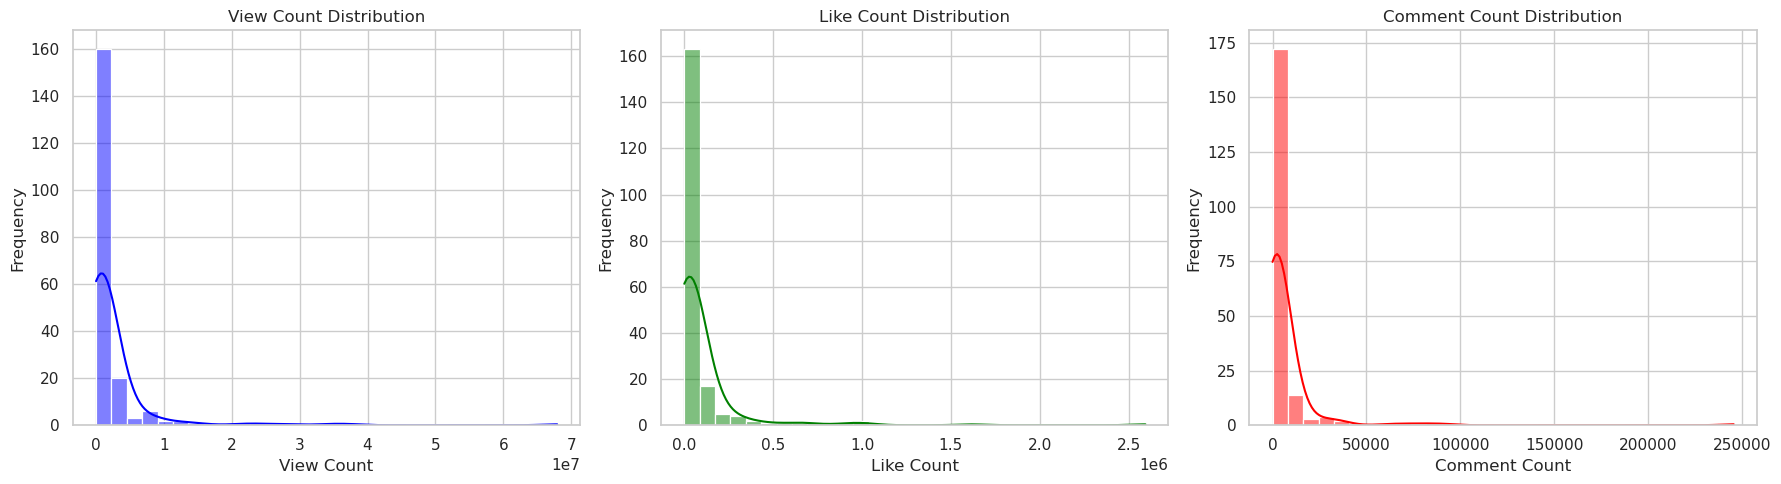

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1,3, figsize=(18, 5))

#View Count distribution

sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# Like count Distribution

sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

#Comment Count Distribution

sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color = 'Red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

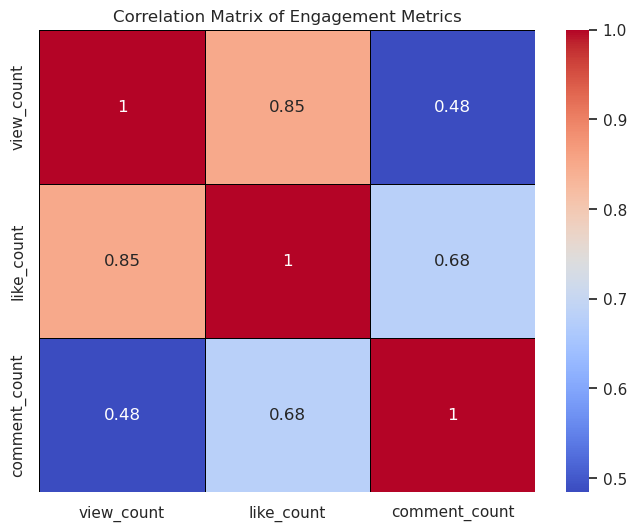

In [23]:
# Correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

In [76]:
from googleapiclient.discovery import build

API_KEY = 'YOUR_API_KEY'
youtube = build('youtube','v3', developerKey= API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='US'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

#Fet the category mapping
category_mapping = get_category_mapping()
category_mapping

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

/tmp/ipykernel_29697/2976753215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')


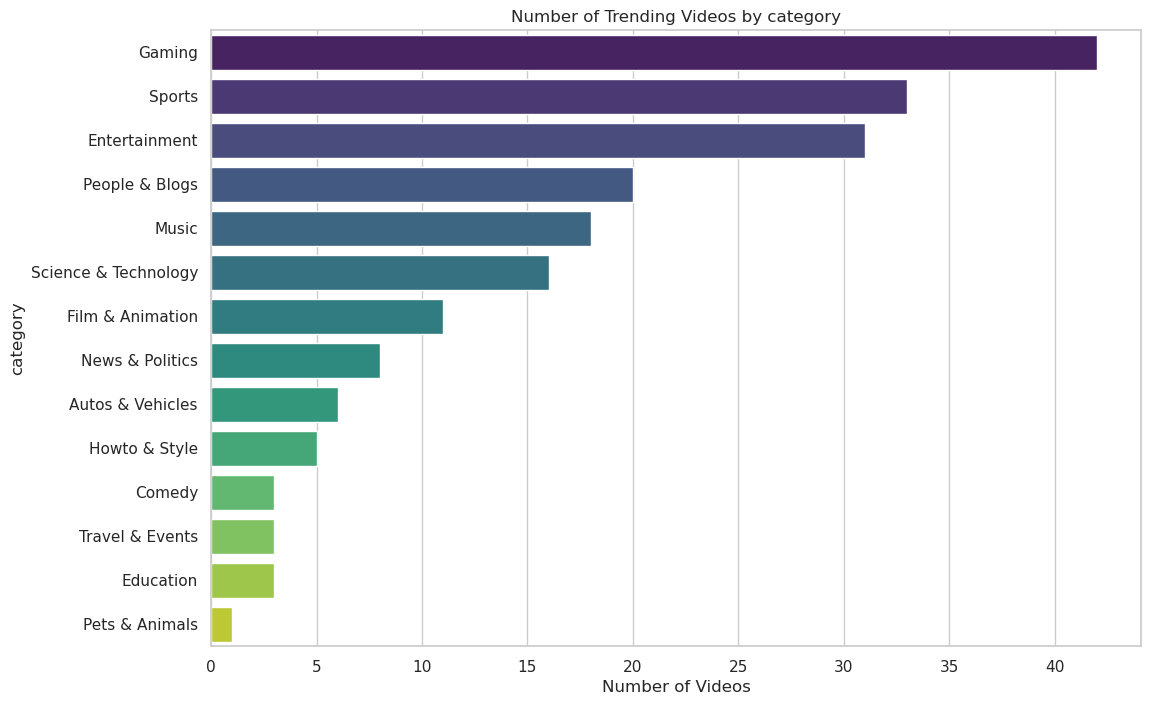

In [25]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12,8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by category')
plt.xlabel('Number of Videos')
plt.ylabel('category')
plt.show()

In [26]:
trending_videos

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name
0,uarNiSl_uh4,Apple Event - September 9,Watch the special Apple Event to learn about t...,2024-09-09 18:47:22+00:00,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"[Apple, Apple Event, iPhone 16, iPhone 16 Pro,...",PT1H38M19S,hd,True,21543728,593874,0,0,0,Science & Technology
1,bEweK7ffTcQ,New York Jets vs. San Francisco 49ers Game Hig...,Check out our other channels:\nNFL Mundo https...,2024-09-10 03:21:58+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,[],PT11M57S,hd,True,1456981,23937,0,0,2775,Sports
2,eDqfg_LexCQ,Introducing iPhone 16 Pro | Apple,This is iPhone 16 Pro. Built for Apple Intelli...,2024-09-09 18:55:07+00:00,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"[Apple, iPhone 16 Pro, iPhone 16 Pro Max, iPho...",PT2M53S,hd,True,9037892,166083,0,0,0,Science & Technology
3,QZAhsa0X_e4,The Pat McAfee Show Live | Monday September 9t...,Welcome to The Pat McAfee Show LIVE from Noon-...,2024-09-09 19:49:16+00:00,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,"[pat mcafee, podcast, sports, nfl, ncaa, footb...",PT3H34M46S,hd,False,508432,8623,0,0,345,Sports
4,14r1_sEd7_U,Apple iPhone 16 Event: Everything Apple Announ...,Apple just announced the new iPhone 16 lineup ...,2024-09-09 20:31:09+00:00,UCaFGDBmGK_jw66u3av2Ysjw,MacRumors,28,"[macrumors, mac rumors, apple, apple rumors, a...",PT12M56S,hd,False,477613,6488,0,0,1352,Science & Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,jYh-_CFrDrc,Season 33 Cast Reveal | Dancing with the Stars,The stars of the new season have arrived to gi...,2024-09-04 12:52:05+00:00,UCLOIoa2aEGcM-z1hJx4vy4w,Dancing With The Stars,24,"[Disney+, Disney Plus, Disney, streaming, Danc...",PT31S,hd,False,2637572,922,0,0,272,Entertainment
196,sgTBZmqrAIA,Alien: Earth | Official Teaser | Sydney Chandl...,The perfect planet for the perfect organism. A...,2024-09-03 15:59:55+00:00,UC2dIDJBf9W88PxGm-uHZPaQ,FX Networks,24,"[FX, Ridley Scott, Alex Lawther, Samuel Blenki...",PT16S,hd,True,596838,7988,0,0,922,Entertainment
197,AiHSbb9xzEo,This KEVIN DURANT Build is INSANE on NBA 2K25,"In today's video, we are playing on our NEW Ke...",2024-09-03 22:53:26+00:00,UCthnSP58HNeD3857_AWIesA,Joey 2K,20,"[NBA 2K25, 2K25, Kevin Durant, NBA 2K25 Build,...",PT11M21S,hd,False,258458,4263,0,0,261,Gaming
198,s6jnvRy7BOk,United v Liverpool Fallout & Gary and Carra Cl...,Welcome to a very special episode of Stick to ...,2024-09-05 16:25:08+00:00,UCjXIw1GlwaY1IzpW_jN9iCQ,The Overlap,22,"[Sky Sports, Sport, Football, Premier League, ...",PT51M19S,hd,False,1581495,19441,0,0,2823,People & Blogs


In [27]:
# Average engagement metrics by category

/tmp/ipykernel_29697/1417499161.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette = 'viridis')
/tmp/ipykernel_29697/1417499161.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette = 'viridis')
/tmp/ipykernel_29697/1417499161.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette = 'vir

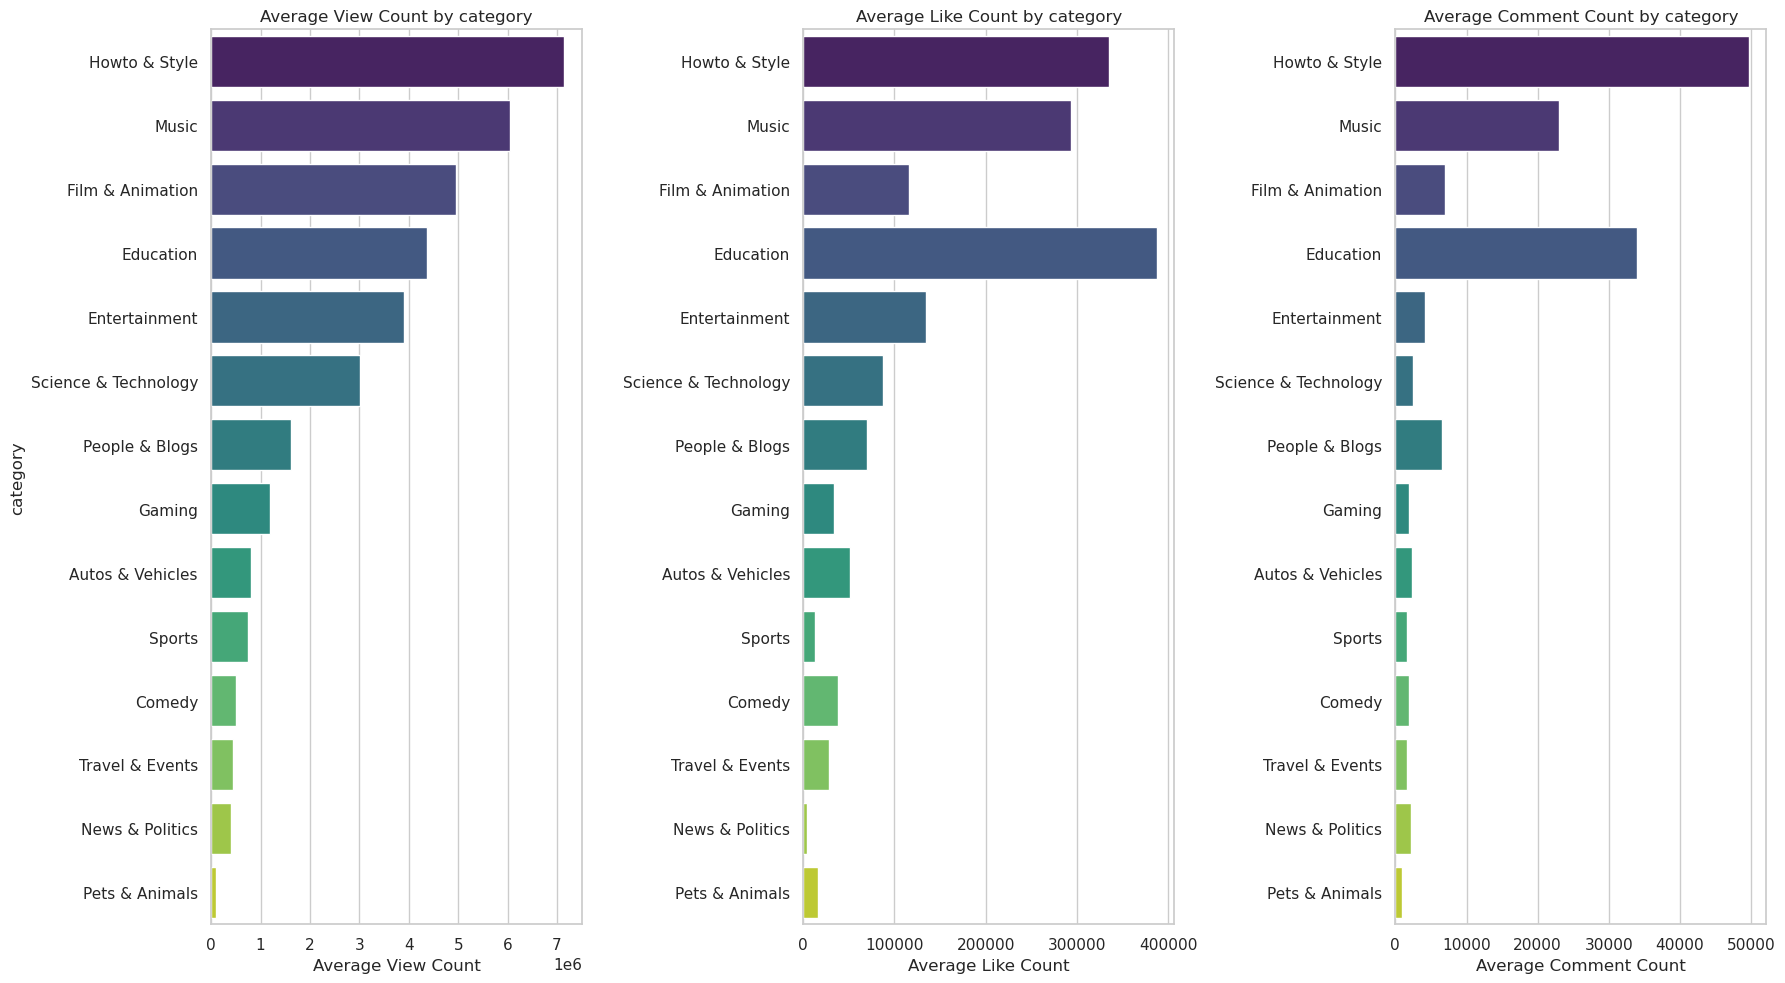

In [28]:
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18,10))

#View count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette = 'viridis')
axes[0].set_title('Average View Count by category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('category')

#Like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette = 'viridis')
axes[1].set_title('Average Like Count by category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

#Comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette = 'viridis')
axes[2].set_title('Average Comment Count by category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

In [29]:
!pip install isodate
import isodate

#Convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

In [30]:
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count,category_name,duration_seconds,duration_range
0,uarNiSl_uh4,Apple Event - September 9,Watch the special Apple Event to learn about t...,2024-09-09 18:47:22+00:00,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"[Apple, Apple Event, iPhone 16, iPhone 16 Pro,...",PT1H38M19S,hd,True,21543728,593874,0,0,0,Science & Technology,5899.0,60-120 min
1,bEweK7ffTcQ,New York Jets vs. San Francisco 49ers Game Hig...,Check out our other channels:\nNFL Mundo https...,2024-09-10 03:21:58+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,[],PT11M57S,hd,True,1456981,23937,0,0,2775,Sports,717.0,10-20 min
2,eDqfg_LexCQ,Introducing iPhone 16 Pro | Apple,This is iPhone 16 Pro. Built for Apple Intelli...,2024-09-09 18:55:07+00:00,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"[Apple, iPhone 16 Pro, iPhone 16 Pro Max, iPho...",PT2M53S,hd,True,9037892,166083,0,0,0,Science & Technology,173.0,0-5 min
3,QZAhsa0X_e4,The Pat McAfee Show Live | Monday September 9t...,Welcome to The Pat McAfee Show LIVE from Noon-...,2024-09-09 19:49:16+00:00,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,"[pat mcafee, podcast, sports, nfl, ncaa, footb...",PT3H34M46S,hd,False,508432,8623,0,0,345,Sports,12886.0,NaN
4,14r1_sEd7_U,Apple iPhone 16 Event: Everything Apple Announ...,Apple just announced the new iPhone 16 lineup ...,2024-09-09 20:31:09+00:00,UCaFGDBmGK_jw66u3av2Ysjw,MacRumors,28,"[macrumors, mac rumors, apple, apple rumors, a...",PT12M56S,hd,False,477613,6488,0,0,1352,Science & Technology,776.0,10-20 min


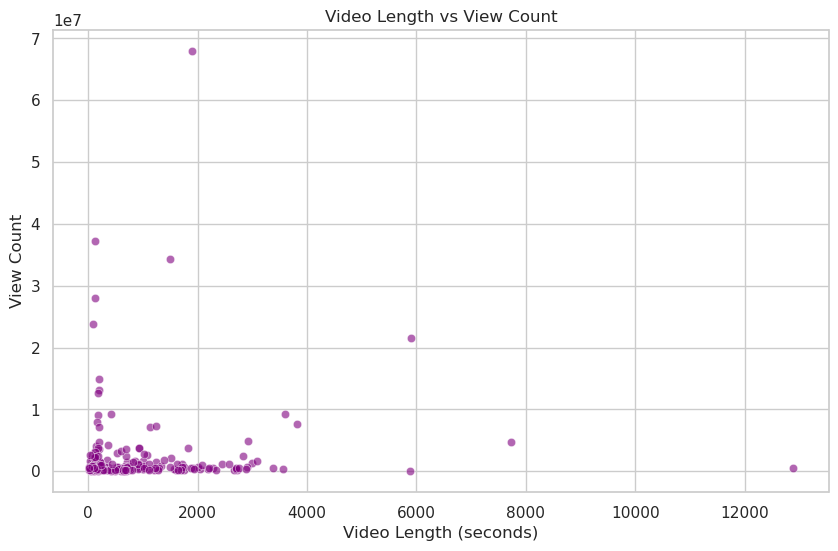

In [31]:
# Scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()


/tmp/ipykernel_29697/865213030.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
/tmp/ipykernel_29697/865213030.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
/tmp/ipykernel_29697/865213030.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=length_engagement.index, x=length_engagement['l

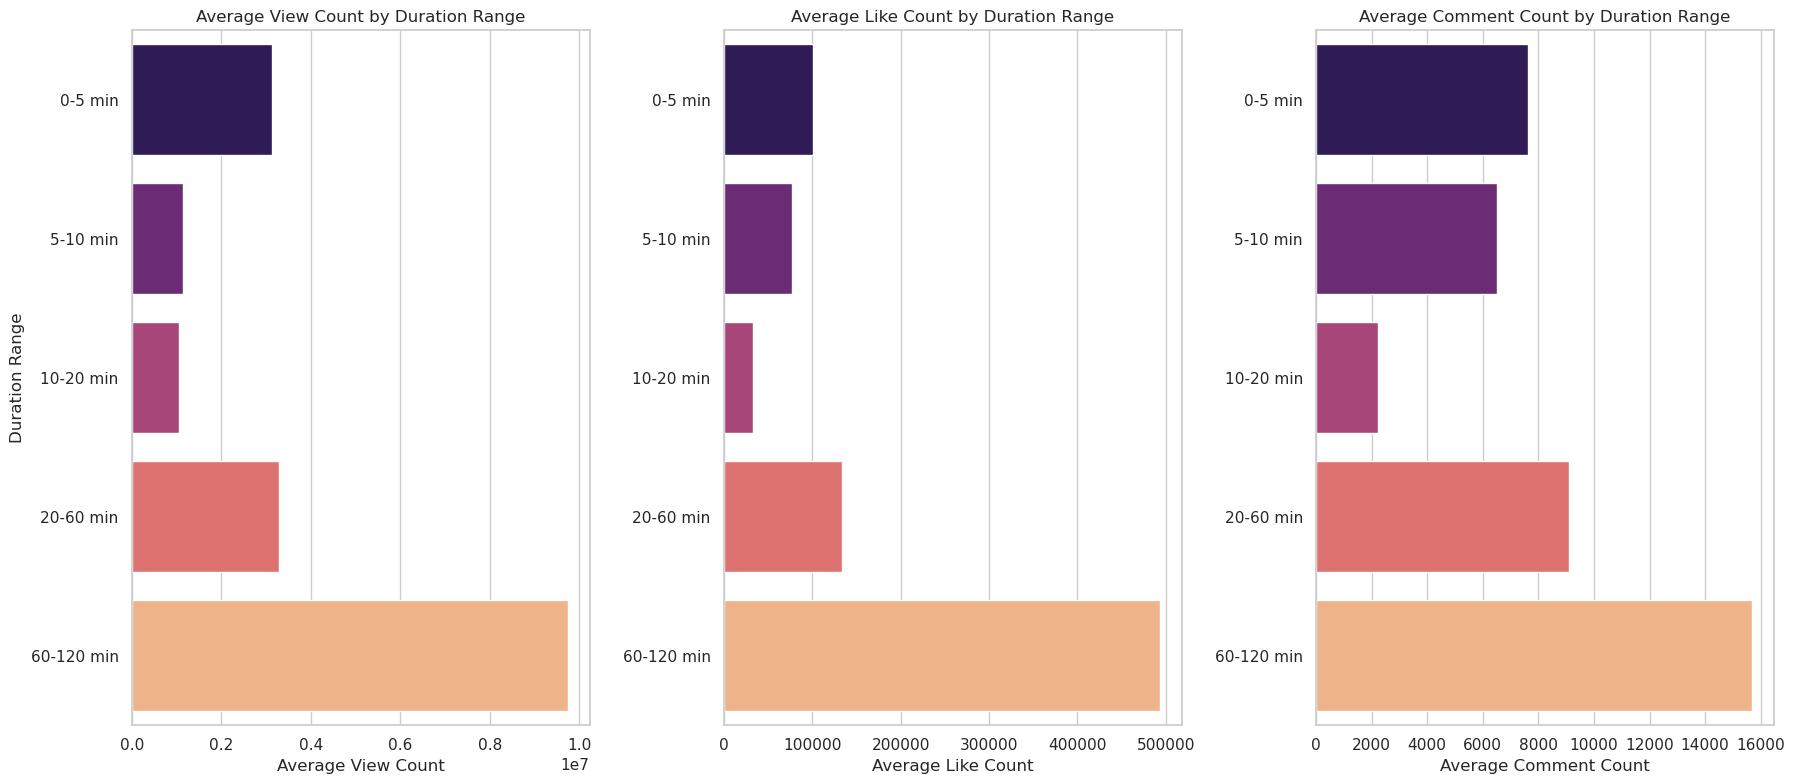

In [64]:
# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

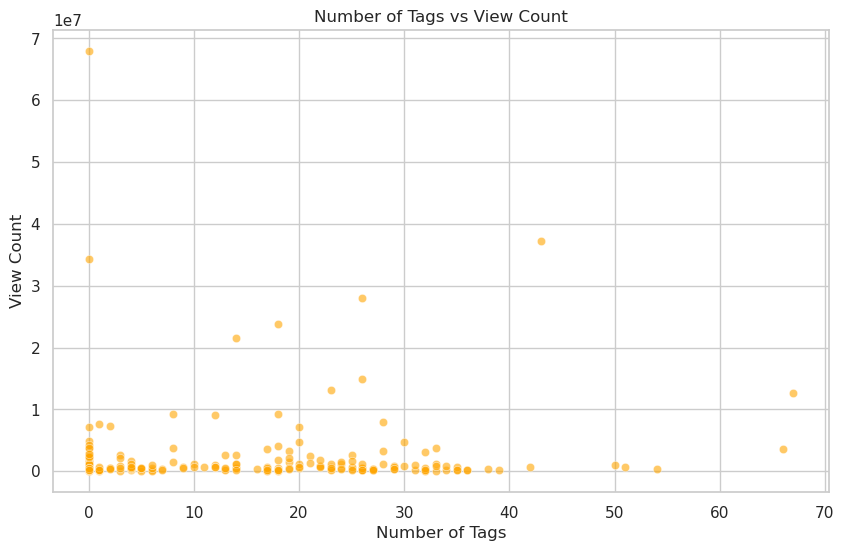

In [66]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

/tmp/ipykernel_29697/1314667626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')


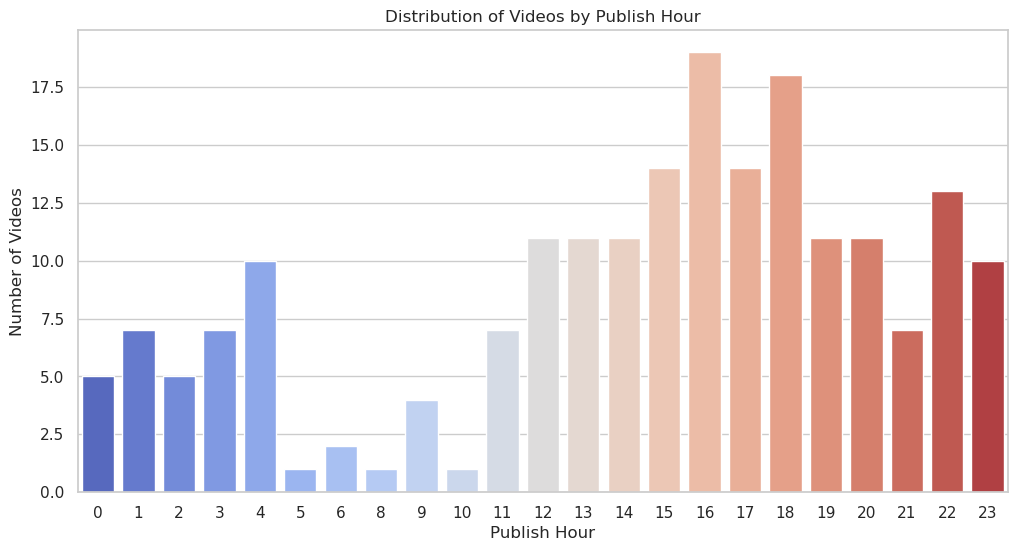

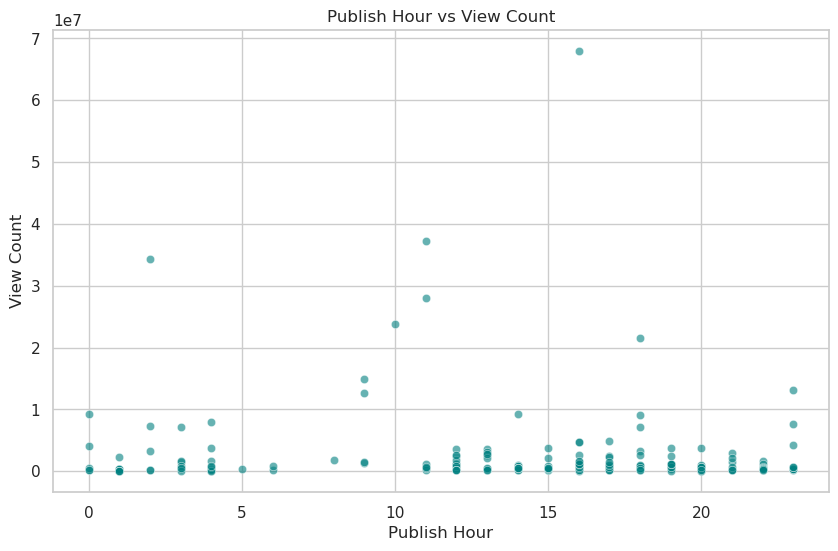

In [68]:
# extract hour of publication
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=trending_videos, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=trending_videos, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()

In [70]:
'''Conclusion
So, here’s my conclusion on what makes a video trend on YouTube:


Encourage viewers to like and comment on videos to boost engagement metrics.
Aim to create long videos (60-80 minutes) for higher engagement, especially for categories like How to style and Education.
Schedule video uploads around peak times (4 PM – 10 PM) to maximize initial views and engagement.'''

'Conclusion\nSo, here’s my conclusion on what makes a video trend on YouTube:\n\n\nEncourage viewers to like and comment on videos to boost engagement metrics.\nAim to create long videos (60-80 minutes) for higher engagement, especially for categories like How to style and Education.\nSchedule video uploads around peak times (4 PM – 10 PM) to maximize initial views and engagement.'